<a href="https://colab.research.google.com/github/almirarana31/datasciencefinal/blob/main/full_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis**

In [ ]:
!pip install nltk textblob
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def safe_analyze_sentiment(text):
    if isinstance(text, str):
        return analyze_sentiment(text)
    else:
        return 'Neutral'

Twitter

In [ ]:
twitter_df = pd.read_csv('combined_tweets.csv')

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,0,0,https://x.com/declared1776/status/177458659968...,267014622,declared1776
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,2,1,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,0,0,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,1,0,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,0,0,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group


In [ ]:
twitter_df['sentiment'] = twitter_df['full_text'].apply(analyze_sentiment)

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,0,0,https://x.com/declared1776/status/177458659968...,267014622,declared1776,Neutral
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,2,1,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280,Neutral
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,0,0,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics,Neutral
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,1,0,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_,Positive
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,0,0,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz,Negative
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh,Positive
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP,Positive
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group,Negative


<ipython-input-60-3a23cfd33876>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=twitter_df, x='sentiment', palette='viridis')


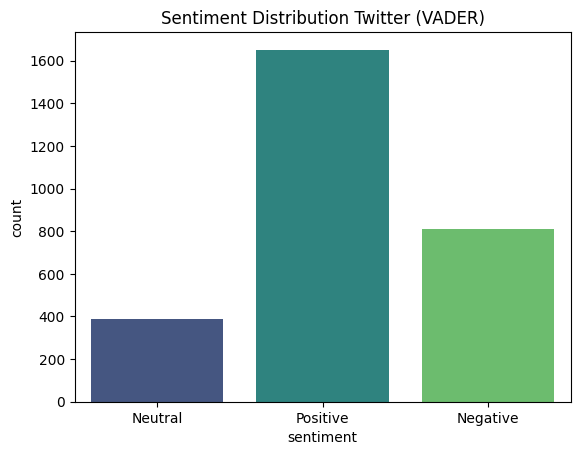

In [ ]:
sns.countplot(data=twitter_df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution Twitter (VADER)")
plt.show()

In [ ]:
twitter_df['total_engagements'] = twitter_df['favorite_count'] + twitter_df['retweet_count'] + twitter_df['reply_count'] + twitter_df['quote_count']
twitter_df['engagement_rate'] = (twitter_df['total_engagements'] / twitter_df['total_engagements'].sum()) * 100

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,total_engagements,engagement_rate
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,0,0,https://x.com/declared1776/status/177458659968...,267014622,declared1776,Neutral,0,0.000000
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,2,1,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280,Neutral,5,0.021820
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,0,0,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics,Neutral,3,0.013092
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,1,0,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_,Positive,14,0.061095
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,0,0,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite,Negative,5,0.021820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,0,0,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz,Negative,1,0.004364
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,0,0,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh,Positive,2,0.008728
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,3,1,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP,Positive,17,0.074187
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,0,0,https://x.com/thec2group/status/12229936387220...,35783396,thec2group,Negative,0,0.000000


In [ ]:
twitter_df['word_count'] = twitter_df['full_text'].apply(lambda x: len(str(x).split()))
twitter_df['char_count'] = twitter_df['full_text'].apply(lambda x: len(str(x)))
twitter_df['hour'] = pd.to_datetime(twitter_df['created_at']).dt.hour
twitter_df['day_of_week'] = pd.to_datetime(twitter_df['created_at']).dt.dayofweek

<ipython-input-11-1fe7492129ea>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  twitter_df['hour'] = pd.to_datetime(twitter_df['created_at']).dt.hour
<ipython-input-11-1fe7492129ea>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  twitter_df['day_of_week'] = pd.to_datetime(twitter_df['created_at']).dt.dayofweek


In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,tweet_url,user_id_str,username,sentiment,total_engagements,engagement_rate,word_count,char_count,hour,day_of_week
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,...,https://x.com/declared1776/status/177458659968...,267014622,declared1776,Neutral,0,0.000000,13,74,23,6
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,...,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280,Neutral,5,0.021820,8,52,23,6
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,...,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics,Neutral,3,0.013092,6,57,23,6
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,...,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_,Positive,14,0.061095,32,301,23,6
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,...,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite,Negative,5,0.021820,45,233,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,...,https://x.com/thefatprincessz/status/122299370...,34268703,thefatprincessz,Negative,1,0.004364,53,295,21,3
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,...,https://x.com/Sammmwichhh/status/1222993680744...,1290268886,Sammmwichhh,Positive,2,0.008728,22,125,21,3
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,...,https://x.com/Mister_SWP/status/12229936783413...,751789298,Mister_SWP,Positive,17,0.074187,53,306,21,3
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,...,https://x.com/thec2group/status/12229936387220...,35783396,thec2group,Negative,0,0.000000,42,300,21,3


In [ ]:
twitter_df.fillna('', inplace=True)

In [ ]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}

twitter_df['sentiment_numeric'] = twitter_df['sentiment'].map(sentiment_mapping)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(twitter_df['full_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topic_distributions = lda.transform(dtm)

topic_columns = [f'topic_{i+1}' for i in range(topic_distributions.shape[1])]
topic_df = pd.DataFrame(topic_distributions, columns=topic_columns)

twitter_df = pd.concat([twitter_df, topic_df], axis=1)

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,word_count,char_count,hour,day_of_week,sentiment_numeric,topic_1,topic_2,topic_3,topic_4,topic_5
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,,,en,,0,...,13,74,23,6,0,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,,,en,"Sialkot, Pakistan",0,...,8,52,23,6,0,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,,,en,You're not allowed until...,0,...,6,57,23,6,0,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,,Gelvetication,en,,0,...,32,301,23,6,1,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,,ask_aubry,en,"Toronto, Ontario",0,...,45,233,23,6,-1,0.012618,0.012721,0.949126,0.012788,0.012747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,,,en,"Toronto, Ontario",0,...,53,295,21,3,-1,0.010073,0.959389,0.010350,0.010093,0.010096
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,,,en,"Iowa City, IA",0,...,22,125,21,3,1,0.015936,0.015747,0.937017,0.015486,0.015814
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,,en,Enjoying life,0,...,53,306,21,3,1,0.477282,0.088764,0.009193,0.415556,0.009205
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,,en,"Grand Rapids, MI",0,...,42,300,21,3,-1,0.010467,0.010154,0.010126,0.010145,0.959109


In [ ]:
X = twitter_df[['sentiment_numeric', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'favorite_count', 'retweet_count', 'reply_count']]
y = twitter_df['engagement_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(twitter_df['full_text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topics = lda.components_
words = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, num_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topic_list.append(topic_words)
        print(f"Topic {topic_idx + 1}:")
        print(", ".join(topic_words))
    return topic_list


num_top_words = 10
topics_list = display_topics(lda, words, num_top_words)

Topic 1:
health, mental, https, people, care, wellness, issues, crisis, children, support
Topic 2:
health, mental, https, 10, day, people, need, help, just, issues
Topic 3:
health, mental, people, like, https, amp, women, don, men, issues
Topic 4:
health, mental, year, new, 2022, happy, better, amp, good, https
Topic 5:
health, mental, 2023, https, good, year, better, time, don, hope


In [ ]:
twitter_df = twitter_df.rename(columns={'topic_1': 'Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support', 'topic_2': 'Topic 2: health, mental, https, 10, day, people, need, help, just, issues', 'topic_3': 'Topic 3: health, mental, people, like, https, amp, women, don, men, issues', 'topic_4': 'Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https', 'topic_5': 'Topic 5: health, mental, 2023, https, good, year, better, time, don, hope'})

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,word_count,char_count,hour,day_of_week,sentiment_numeric,"Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support","Topic 2: health, mental, https, 10, day, people, need, help, just, issues","Topic 3: health, mental, people, like, https, amp, women, don, men, issues","Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https","Topic 5: health, mental, 2023, https, good, year, better, time, don, hope"
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,,,en,,0,...,13,74,23,6,0,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,,,en,"Sialkot, Pakistan",0,...,8,52,23,6,0,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,,,en,You're not allowed until...,0,...,6,57,23,6,0,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,,Gelvetication,en,,0,...,32,301,23,6,1,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,,ask_aubry,en,"Toronto, Ontario",0,...,45,233,23,6,-1,0.012618,0.012721,0.949126,0.012788,0.012747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,,,en,"Toronto, Ontario",0,...,53,295,21,3,-1,0.010073,0.959389,0.010350,0.010093,0.010096
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,,,en,"Iowa City, IA",0,...,22,125,21,3,1,0.015936,0.015747,0.937017,0.015486,0.015814
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,,en,Enjoying life,0,...,53,306,21,3,1,0.477282,0.088764,0.009193,0.415556,0.009205
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,,en,"Grand Rapids, MI",0,...,42,300,21,3,-1,0.010467,0.010154,0.010126,0.010145,0.959109


In [ ]:
twitter_df.to_csv('twitter_finalized.csv', index=False)

In [ ]:
twitter_df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,word_count,char_count,hour,day_of_week,sentiment_numeric,"Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support","Topic 2: health, mental, https, 10, day, people, need, help, just, issues","Topic 3: health, mental, people, like, https, amp, women, don, men, issues","Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https","Topic 5: health, mental, 2023, https, good, year, better, time, don, hope"
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,...,13,74,23,6,1,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,...,8,52,23,6,1,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,...,6,57,23,6,1,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,...,32,301,23,6,2,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,...,45,233,23,6,0,0.012618,0.012721,0.949126,0.012788,0.012747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2843,1222686272143142914,Thu Jan 30 21:23:16 +0000 2020,1,@jazz_inmypants This is such a beautiful threa...,1222993705419911179,NaN,NaN,en,"Toronto, Ontario",0,...,53,295,21,3,0,0.010073,0.959389,0.010350,0.010093,0.010096
2844,1222993680744820747,Thu Jan 30 21:23:10 +0000 2020,2,Entire nursing program: safety is always ur nu...,1222993680744820747,NaN,NaN,en,"Iowa City, IA",0,...,22,125,21,3,2,0.015936,0.015747,0.937017,0.015486,0.015814
2845,1222993678341373953,Thu Jan 30 21:23:09 +0000 2020,13,2nd can in 2 days with this lovley beer. Celeb...,1222993678341373953,https://pbs.twimg.com/media/EPjyQ7fXUAEtDnk.jpg,NaN,en,Enjoying life,0,...,53,306,21,3,2,0.477282,0.088764,0.009193,0.415556,0.009205
2846,1222993638722064385,Thu Jan 30 21:23:00 +0000 2020,0,We want to support the mental health and wellb...,1222993638722064385,https://pbs.twimg.com/media/EPjTw2dXsAIDerI.jpg,NaN,en,"Grand Rapids, MI",0,...,42,300,21,3,0,0.010467,0.010154,0.010126,0.010145,0.959109


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


**Tumblr**

In [ ]:
tumblr_df

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,likes,year
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,0,2024
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,0,2024
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,0,2024
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,0,2024
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,0,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2020-01-26 05:34:00,https://pansexualjamestkirk.tumblr.com/post/19...,pansexualjamestkirk,NaN,"['love', 'hope', 'romantic love', 'personal', ...",wish could open love,0,0,0,0,0,2020
4993,2020-01-26 05:30:48,https://www.tumblr.com/blog/view/todd--chavez/...,todd--chavez,Couldn't Get Title,"['anxiety', 'anxiety attack', 'anxiety attacks...",couldnt get post body,0,1393,0,0,0,2020
4994,2020-01-26 05:14:17,https://www.tumblr.com/blog/view/shitpost-anew...,shitpost-anewmusical,NaN,"['ptsd', 'mental health', 'mental health aware...",hey folks small psaso ive noticed lot people u...,0,1,0,0,0,2020
4995,2020-01-26 05:10:25,https://www.tumblr.com/blog/view/mlezapos/1904...,mlezapos,NaN,"['bpd', 'borderline personality disorder', 'me...",brain scatteredyou alice ill mad hatter,0,1,0,0,0,2020


In [ ]:
tumblr_df['sentiment'] = tumblr_df['body'].apply(safe_analyze_sentiment)

In [ ]:
tumblr_df

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,likes,year,sentiment
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,0,2024,Positive
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,0,2024,Negative
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,0,2024,Negative
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,0,2024,Positive
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,0,2024,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2020-01-26 05:34:00,https://pansexualjamestkirk.tumblr.com/post/19...,pansexualjamestkirk,NaN,"['love', 'hope', 'romantic love', 'personal', ...",wish could open love,0,0,0,0,0,2020,Positive
4993,2020-01-26 05:30:48,https://www.tumblr.com/blog/view/todd--chavez/...,todd--chavez,Couldn't Get Title,"['anxiety', 'anxiety attack', 'anxiety attacks...",couldnt get post body,0,1393,0,0,0,2020,Neutral
4994,2020-01-26 05:14:17,https://www.tumblr.com/blog/view/shitpost-anew...,shitpost-anewmusical,NaN,"['ptsd', 'mental health', 'mental health aware...",hey folks small psaso ive noticed lot people u...,0,1,0,0,0,2020,Positive
4995,2020-01-26 05:10:25,https://www.tumblr.com/blog/view/mlezapos/1904...,mlezapos,NaN,"['bpd', 'borderline personality disorder', 'me...",brain scatteredyou alice ill mad hatter,0,1,0,0,0,2020,Negative


In [ ]:
sentiment_mapping = {
    'Positive': 1,
    'Negative': -1,
    'Neutral': 0
}

tumblr_df['sentiment_numeric'] = tumblr_df['sentiment'].map(sentiment_mapping)

In [ ]:
tumblr_df['body'] = tumblr_df['body'].fillna('')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(tumblr_df['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topic_distributions = lda.transform(dtm)

topic_columns = [f'topic_{i+1}' for i in range(topic_distributions.shape[1])]
topic_df = pd.DataFrame(topic_distributions, columns=topic_columns)

tumblr_df = pd.concat([tumblr_df, topic_df], axis=1)

In [ ]:
tumblr_df

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,likes,year,sentiment,sentiment_numeric,topic_1,topic_2,topic_3,topic_4,topic_5
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,0,2024,Positive,1,0.884651,0.028986,0.029047,0.028575,0.028741
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,0,2024,Negative,-1,0.008492,0.114067,0.008484,0.008337,0.860620
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,0,2024,Negative,-1,0.088431,0.086116,0.001156,0.427569,0.396729
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,0,2024,Positive,1,0.008110,0.008193,0.334963,0.008004,0.640731
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,0,2024,Neutral,0,0.025390,0.025431,0.025673,0.025013,0.898494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2020-01-26 05:34:00,https://pansexualjamestkirk.tumblr.com/post/19...,pansexualjamestkirk,NaN,"['love', 'hope', 'romantic love', 'personal', ...",wish could open love,0,0,0,0,0,2020,Positive,1,0.050391,0.050478,0.051484,0.050061,0.797586
4993,2020-01-26 05:30:48,https://www.tumblr.com/blog/view/todd--chavez/...,todd--chavez,Couldn't Get Title,"['anxiety', 'anxiety attack', 'anxiety attacks...",couldnt get post body,0,1393,0,0,0,2020,Neutral,0,0.066684,0.066670,0.066669,0.733291,0.066685
4994,2020-01-26 05:14:17,https://www.tumblr.com/blog/view/shitpost-anew...,shitpost-anewmusical,NaN,"['ptsd', 'mental health', 'mental health aware...",hey folks small psaso ive noticed lot people u...,0,1,0,0,0,2020,Positive,1,0.004263,0.004272,0.004236,0.004174,0.983056
4995,2020-01-26 05:10:25,https://www.tumblr.com/blog/view/mlezapos/1904...,mlezapos,NaN,"['bpd', 'borderline personality disorder', 'me...",brain scatteredyou alice ill mad hatter,0,1,0,0,0,2020,Negative,-1,0.040070,0.040108,0.838303,0.040477,0.041043


In [ ]:
tumblr_df['total_engagements'] = tumblr_df['reblogs'] + tumblr_df['notes'] + tumblr_df['replies'] + tumblr_df['shares'] + tumblr_df['likes']
tumblr_df['engagement_rate'] = (tumblr_df['total_engagements'] / tumblr_df['total_engagements'].sum()) * 100

In [ ]:
tumblr_df[['reblogs', 'notes', 'replies', 'shares', 'likes']] = tumblr_df[['reblogs', 'notes', 'replies', 'shares', 'likes']].fillna(0)

In [ ]:
tumblr_df['engagement_rate'] = tumblr_df['engagement_rate'].fillna(0)

In [ ]:
tumblr_df

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,...,year,sentiment,sentiment_numeric,topic_1,topic_2,topic_3,topic_4,topic_5,total_engagements,engagement_rate
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,...,2024,Positive,1,0.884651,0.028986,0.029047,0.028575,0.028741,2,0.000383
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,...,2024,Negative,-1,0.008492,0.114067,0.008484,0.008337,0.860620,128,0.024490
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,...,2024,Negative,-1,0.088431,0.086116,0.001156,0.427569,0.396729,2,0.000383
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,...,2024,Positive,1,0.008110,0.008193,0.334963,0.008004,0.640731,7,0.001339
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,...,2024,Neutral,0,0.025390,0.025431,0.025673,0.025013,0.898494,1,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2020-01-26 05:34:00,https://pansexualjamestkirk.tumblr.com/post/19...,pansexualjamestkirk,NaN,"['love', 'hope', 'romantic love', 'personal', ...",wish could open love,0,0,0,0,...,2020,Positive,1,0.050391,0.050478,0.051484,0.050061,0.797586,0,0.000000
4993,2020-01-26 05:30:48,https://www.tumblr.com/blog/view/todd--chavez/...,todd--chavez,Couldn't Get Title,"['anxiety', 'anxiety attack', 'anxiety attacks...",couldnt get post body,0,1393,0,0,...,2020,Neutral,0,0.066684,0.066670,0.066669,0.733291,0.066685,1393,0.266521
4994,2020-01-26 05:14:17,https://www.tumblr.com/blog/view/shitpost-anew...,shitpost-anewmusical,NaN,"['ptsd', 'mental health', 'mental health aware...",hey folks small psaso ive noticed lot people u...,0,1,0,0,...,2020,Positive,1,0.004263,0.004272,0.004236,0.004174,0.983056,1,0.000191
4995,2020-01-26 05:10:25,https://www.tumblr.com/blog/view/mlezapos/1904...,mlezapos,NaN,"['bpd', 'borderline personality disorder', 'me...",brain scatteredyou alice ill mad hatter,0,1,0,0,...,2020,Negative,-1,0.040070,0.040108,0.838303,0.040477,0.041043,1,0.000191


In [ ]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(tumblr_df['body'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topics = lda.components_
words = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, num_top_words):
    topic_list = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        topic_list.append(topic_words)
        print(f"Topic {topic_idx + 1}:")
        print(", ".join(topic_words))
    return topic_list

num_top_words = 10
topics_list = display_topics(lda, words, num_top_words)

Topic 1:
mental, health, depression, disorder, adhd, illness, wordpress, anxiety, help, news
Topic 2:
mental, gratitude, people, life, time, ocd, yang, health, daily, god
Topic 3:
like, want, love, que, feel, hate, im, new, feeling, people
Topic 4:
post, body, und, ich, das, nicht, zu, die, instagram, shared
Topic 5:
im, like, dont, feel, people, know, time, want, things, life


In [ ]:
tumblr_df = tumblr_df.rename(columns={'topic_1': 'Topic 1: mental, health, depression, disorder, adhd, illness, wordpress, anxiety, help, news', 'topic_2': 'Topic 2: mental, gratitude, people, life, time, ocd, yang, health, daily, god', 'topic_3': 'Topic 3: like, want, love, que, feel, hate, im, new, feeling, people', 'topic_4': 'Topic 4: post, body, und, ich, das, nicht, zu, die, instagram, shared', 'topic_5': 'Topic 5: im, like, dont, feel, people, know, time, want, things, life'})

In [ ]:
tumblr_df.to_csv('tumblr_finalized.csv', index=False)

In [ ]:
tumblr_df = tumblr_df.iloc[:, :-5]

In [ ]:
tumblr_df

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,...,year,sentiment,sentiment_numeric,"Topic 1: mental, health, depression, disorder, adhd, illness, wordpress, anxiety, help, news","Topic 2: mental, gratitude, people, life, time, ocd, yang, health, daily, god","Topic 3: like, want, love, que, feel, hate, im, new, feeling, people","Topic 4: post, body, und, ich, das, nicht, zu, die, instagram, shared","Topic 5: im, like, dont, feel, people, know, time, want, things, life",total_engagements,engagement_rate
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,...,2024,Positive,1,0.884651,0.028986,0.029047,0.028575,0.028741,2,0.000383
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,...,2024,Negative,-1,0.008492,0.114067,0.008484,0.008337,0.860620,128,0.024490
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,...,2024,Negative,-1,0.088431,0.086116,0.001156,0.427569,0.396729,2,0.000383
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,...,2024,Positive,1,0.008110,0.008193,0.334963,0.008004,0.640731,7,0.001339
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,...,2024,Neutral,0,0.025390,0.025431,0.025673,0.025013,0.898494,1,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,2020-01-26 05:34:00,https://pansexualjamestkirk.tumblr.com/post/19...,pansexualjamestkirk,NaN,"['love', 'hope', 'romantic love', 'personal', ...",wish could open love,0,0,0,0,...,2020,Positive,1,0.050391,0.050478,0.051484,0.050061,0.797586,0,0.000000
4993,2020-01-26 05:30:48,https://www.tumblr.com/blog/view/todd--chavez/...,todd--chavez,Couldn't Get Title,"['anxiety', 'anxiety attack', 'anxiety attacks...",couldnt get post body,0,1393,0,0,...,2020,Neutral,0,0.066684,0.066670,0.066669,0.733291,0.066685,1393,0.266521
4994,2020-01-26 05:14:17,https://www.tumblr.com/blog/view/shitpost-anew...,shitpost-anewmusical,NaN,"['ptsd', 'mental health', 'mental health aware...",hey folks small psaso ive noticed lot people u...,0,1,0,0,...,2020,Positive,1,0.004263,0.004272,0.004236,0.004174,0.983056,1,0.000191
4995,2020-01-26 05:10:25,https://www.tumblr.com/blog/view/mlezapos/1904...,mlezapos,NaN,"['bpd', 'borderline personality disorder', 'me...",brain scatteredyou alice ill mad hatter,0,1,0,0,...,2020,Negative,-1,0.040070,0.040108,0.838303,0.040477,0.041043,1,0.000191


In [ ]:
X = tumblr_df[['sentiment_numeric', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'reblogs', 'notes', 'replies', 'shares', 'likes']]
y = tumblr_df['engagement_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-42-42642bb5e78a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=tumblr_df, x='sentiment', palette='viridis')


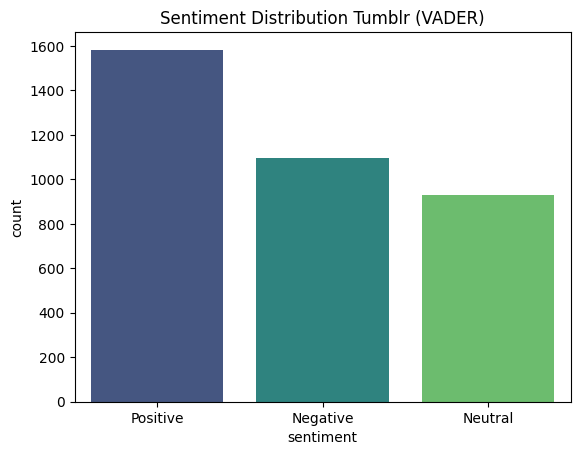

In [ ]:
sns.countplot(data=tumblr_df, x='sentiment', palette='viridis')
plt.title("Sentiment Distribution Tumblr (VADER)")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)
print(f"Random Forest MSE: {mean_squared_error(y_test, rf_predictions)}")
print(f"Random Forest R^2: {r2_score(y_test, rf_predictions)}")

xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
print(f"XGBoost MSE: {mean_squared_error(y_test, xgb_predictions)}")
print(f"XGBoost R^2: {r2_score(y_test, xgb_predictions)}")

Random Forest MSE: 2.8259508524780934e-05
Random Forest R^2: 0.9991930808103588
XGBoost MSE: 0.0001543424789337401
XGBoost R^2: 0.995592920240661


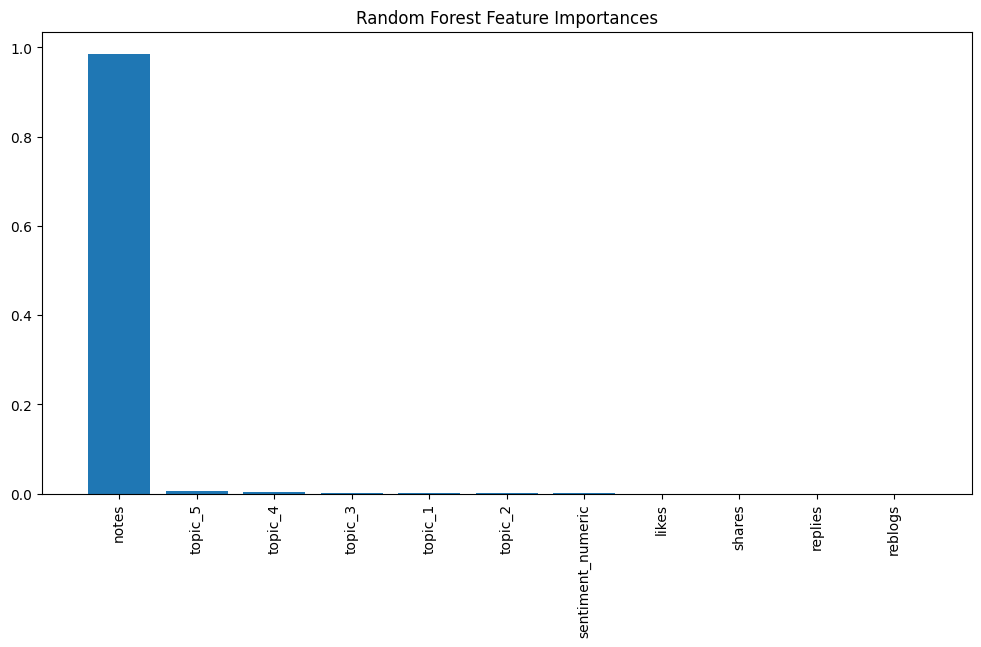

In [ ]:
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(X_train.columns)[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

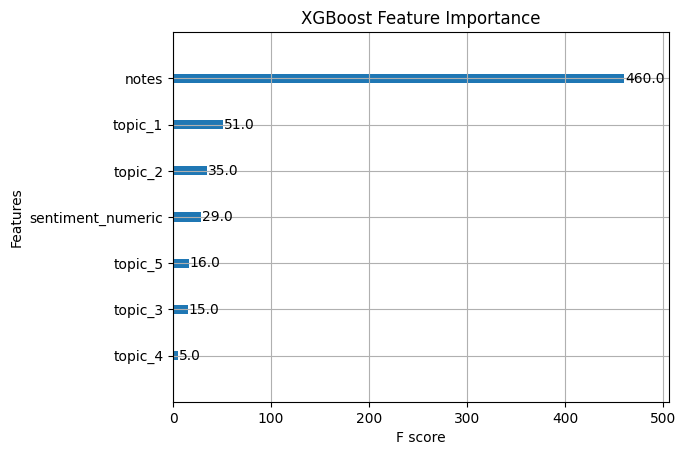

In [ ]:
import xgboost as xgb
from xgboost import plot_importance

plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.show()

In [ ]:
twitter_df = pd.read_csv('twitter_finalized.csv')
tumblr_df = pd.read_csv('tumblr_finalized.csv')

In [ ]:
twitter_df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,word_count,char_count,hour,day_of_week,sentiment_numeric,"Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support","Topic 2: health, mental, https, 10, day, people, need, help, just, issues","Topic 3: health, mental, people, like, https, amp, women, don, men, issues","Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https","Topic 5: health, mental, 2023, https, good, year, better, time, don, hope"
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,...,13,74,23,6,0,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,...,8,52,23,6,0,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,...,6,57,23,6,0,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,...,32,301,23,6,1,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,...,45,233,23,6,-1,0.012618,0.012721,0.949126,0.012788,0.012747


In [ ]:
tumblr_df.head()

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,...,total_engagements,engagement_rate,dominant_topic,hour,day_of_week,word_count,char_count,has_url,has_media_keywords,has_media
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,...,2,0.000383,"Topic 1: mental, health, depression, disorder,...",23,Tuesday,8,65,False,False,False
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,...,128,0.024490,"Topic 5: im, like, dont, feel, people, know, t...",23,Tuesday,30,202,False,False,False
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,...,2,0.000383,"Topic 4: post, body, und, ich, das, nicht, zu,...",23,Tuesday,198,1546,False,False,False
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,...,7,0.001339,"Topic 5: im, like, dont, feel, people, know, t...",23,Tuesday,28,197,False,False,False
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,...,1,0.000191,"Topic 5: im, like, dont, feel, people, know, t...",23,Tuesday,8,55,False,False,False


In [ ]:
import pandas as pd
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

data = [["mental", "health", "depression", "disorder", "adhd", "illness", "wordpress", "anxiety", "help", "news"],
["mental", "gratitude", "people", "life", "time", "ocd", "yang", "health", "daily", "god"],
["like", "want", "love", "que", "feel", "hate", "im","new", "feeling", "people"],
["post", "body", "und", "ich", "das", "nicht", "zu", "die", "instagram", "shared"],
["im", "like", "dont", "feel", "people", "know", "time", "want", "things", "life"]]

df = pd.DataFrame(data)

topic_columns = df.columns
tokenized_topics = []

for col in topic_columns:
    combined_words = " ".join(df[col].tolist())
    tokenized_topics.append(combined_words.split(", "))

print("Tokenized Topics:", tokenized_topics)

dictionary = corpora.Dictionary(tokenized_topics)
corpus = [dictionary.doc2bow(topic) for topic in tokenized_topics]

lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=len(topic_columns), passes=10)

coherence_model = CoherenceModel(model=lda_model, texts=tokenized_topics, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence Score: {coherence_score:.4f}")

Tokenized Topics: [['mental mental like post im'], ['health gratitude want body like'], ['depression people love und dont'], ['disorder life que ich feel'], ['adhd time feel das people'], ['illness ocd hate nicht know'], ['wordpress yang im zu time'], ['anxiety health new die want'], ['help daily feeling instagram things'], ['news god people shared life']]
Coherence Score: 0.7634


In [ ]:
import pandas as pd

twitter = pd.read_csv('twitter_cleaned.csv')
tumblr = pd.read_csv('tumblr_cleaned (1).csv')
tiktok = pd.read_csv('tiktok_finalized.csv')

print(twitter.head())
print(tumblr.head())
print(tiktok.head())

   Unnamed: 0      Video ID  \
0           0  7.325396e+18   
1           1  7.325396e+18   
2           2  7.325396e+18   
3           3  7.325396e+18   
4           4  7.325396e+18   

                                          Video Link  \
0  https://www.tiktok.com/@hanaboonesurvivor/vide...   
1  https://www.tiktok.com/@hanaboonesurvivor/vide...   
2  https://www.tiktok.com/@hanaboonesurvivor/vide...   
3  https://www.tiktok.com/@hanaboonesurvivor/vide...   
4  https://www.tiktok.com/@hanaboonesurvivor/vide...   

                                         Description    Likes  Comments  \
0  TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...  53800.0     643.0   
1  TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...  53800.0     643.0   
2  TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...  53800.0     643.0   
3  TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...  53800.0     643.0   
4  TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...  53800.0     643.0   

   Shares          Upload

In [ ]:
tiktok['engagement_rate'] = ((tiktok['Likes'] + tiktok['Comments'] + tiktok['Shares']) / tiktok['User Followers'] * 100)

In [ ]:
tiktok

,Unnamed: 0,Video ID,Video Link,Description,Likes,Comments,Shares,Upload Date,Sentiment,Duration (seconds),Nouns,User Followers,engagement_rate
0,0,7.325396e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...,53800.0,643.0,547.0,2024-01-18 18:18:47,neutral,346.0,"distinguishes, people, claims, depression, exa...",10800.0,509.166667
1,64,7.355856e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Tanda Perlu Ke Psikolog/Psikiater #menta...,34800.0,544.0,1029.0,2024-04-09 20:18:23,positive,260.0,"signs, sikeater, example, video, video, videos...",10800.0,336.787037
2,72,7.150905e+18,https://www.tiktok.com/@afinasyf/video/7150905...,hal yang paling ditakuti oleh para survivor ad...,2104.0,5.0,27.0,2022-10-05 13:05:19,negative,57.0,"afraid, time, times, time, parents, words, exa...",388000.0,0.550515
3,73,7.374727e+18,https://www.tiktok.com/@ibunda.id/video/737472...,ADHD adalah gangguan mental berupa kesulitan f...,14500.0,113.0,785.0,2024-05-30 16:48:42,negative,19.0,scarf,19300.0,79.782383
4,81,7.348346e+18,https://www.tiktok.com/@ayana.ib/video/7348346...,PTSD (post-traumatic stress disorder) atau gan...,25600.0,366.0,672.0,2024-03-20 14:37:09,positive,11.0,"Nobody, way",28500.0,93.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,5421,NaN,https://www.tiktok.com/@redneck_sith_lord/vide...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,error,NaN,NaN
700,5422,NaN,https://www.tiktok.com/@wanoxr/video/728470060...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye,NaN,NaN
701,5423,NaN,https://www.tiktok.com/@sungkarsfamily/video/7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"closetya, problems, bro, hands, heart, organ, ...",NaN,NaN
702,5424,NaN,https://www.tiktok.com/@dr.nabilaaa/video/7315...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tiktok = tiktok.dropna()
tiktok = tiktok.drop_duplicates()

In [ ]:
print(tiktok[['engagement_rate', 'Sentiment']].isnull().sum())

engagement_rate    0
Sentiment          0
dtype: int64


In [ ]:
print(tiktok['Sentiment'].value_counts())

Sentiment
neutral     1663
positive    1576
negative    1028
Name: count, dtype: int64


In [ ]:
tiktok = pd.read_csv('tiktok_cleaned.csv')
tiktok

,Unnamed: 0,Video ID,Video Link,Description,Likes,Comments,Shares,Upload Date,Sentiment,Duration (seconds),Nouns,User Followers
0,0,7.325396e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...,53800.0,643.0,547.0,2024-01-18 18:18:47,neutral,346.0,"distinguishes, people, claims, depression, exa...",10800.0
1,64,7.355856e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Tanda Perlu Ke Psikolog/Psikiater #menta...,34800.0,544.0,1029.0,2024-04-09 20:18:23,positive,260.0,"signs, sikeater, example, video, video, videos...",10800.0
2,72,7.150905e+18,https://www.tiktok.com/@afinasyf/video/7150905...,hal yang paling ditakuti oleh para survivor ad...,2104.0,5.0,27.0,2022-10-05 13:05:19,negative,57.0,"afraid, time, times, time, parents, words, exa...",388000.0
3,73,7.374727e+18,https://www.tiktok.com/@ibunda.id/video/737472...,ADHD adalah gangguan mental berupa kesulitan f...,14500.0,113.0,785.0,2024-05-30 16:48:42,negative,19.0,scarf,19300.0
4,81,7.348346e+18,https://www.tiktok.com/@ayana.ib/video/7348346...,PTSD (post-traumatic stress disorder) atau gan...,25600.0,366.0,672.0,2024-03-20 14:37:09,positive,11.0,"Nobody, way",28500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
699,5421,NaN,https://www.tiktok.com/@redneck_sith_lord/vide...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,error,NaN
700,5422,NaN,https://www.tiktok.com/@wanoxr/video/728470060...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye,NaN
701,5423,NaN,https://www.tiktok.com/@sungkarsfamily/video/7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"closetya, problems, bro, hands, heart, organ, ...",NaN
702,5424,NaN,https://www.tiktok.com/@dr.nabilaaa/video/7315...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
tiktok['Sentiment'] = tiktok['Sentiment'].fillna('')
tiktok['engagement_rate'] = tiktok['engagement_rate'].fillna(0)
tiktok

,Unnamed: 0,Video ID,Video Link,Description,Likes,Comments,Shares,Upload Date,Sentiment,Duration (seconds),Nouns,User Followers,engagement_rate
0,0,7.325396e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...,53800.0,643.0,547.0,2024-01-18 18:18:47,neutral,346.0,"distinguishes, people, claims, depression, exa...",10800.0,509.166667
1,64,7.355856e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Tanda Perlu Ke Psikolog/Psikiater #menta...,34800.0,544.0,1029.0,2024-04-09 20:18:23,positive,260.0,"signs, sikeater, example, video, video, videos...",10800.0,336.787037
2,72,7.150905e+18,https://www.tiktok.com/@afinasyf/video/7150905...,hal yang paling ditakuti oleh para survivor ad...,2104.0,5.0,27.0,2022-10-05 13:05:19,negative,57.0,"afraid, time, times, time, parents, words, exa...",388000.0,0.550515
3,73,7.374727e+18,https://www.tiktok.com/@ibunda.id/video/737472...,ADHD adalah gangguan mental berupa kesulitan f...,14500.0,113.0,785.0,2024-05-30 16:48:42,negative,19.0,scarf,19300.0,79.782383
4,81,7.348346e+18,https://www.tiktok.com/@ayana.ib/video/7348346...,PTSD (post-traumatic stress disorder) atau gan...,25600.0,366.0,672.0,2024-03-20 14:37:09,positive,11.0,"Nobody, way",28500.0,93.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,5421,NaN,https://www.tiktok.com/@redneck_sith_lord/vide...,NaN,NaN,NaN,NaN,NaN,,NaN,error,NaN,0.000000
700,5422,NaN,https://www.tiktok.com/@wanoxr/video/728470060...,NaN,NaN,NaN,NaN,NaN,,NaN,Bye,NaN,0.000000
701,5423,NaN,https://www.tiktok.com/@sungkarsfamily/video/7...,NaN,NaN,NaN,NaN,NaN,,NaN,"closetya, problems, bro, hands, heart, organ, ...",NaN,0.000000
702,5424,NaN,https://www.tiktok.com/@dr.nabilaaa/video/7315...,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,0.000000


In [ ]:
tiktok = tiktok.dropna()
tiktok = tiktok.drop_duplicates()

In [ ]:
tiktok

,Unnamed: 0,Video ID,Video Link,Description,Likes,Comments,Shares,Upload Date,Sentiment,Duration (seconds),Nouns,User Followers,engagement_rate
0,0,7.325396e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Perbedaan Orang Depresi dan Mengaku Depr...,53800.0,643.0,547.0,2024-01-18 18:18:47,neutral,346.0,"distinguishes, people, claims, depression, exa...",10800.0,509.166667
1,64,7.355856e+18,https://www.tiktok.com/@hanaboonesurvivor/vide...,TOP 5 Tanda Perlu Ke Psikolog/Psikiater #menta...,34800.0,544.0,1029.0,2024-04-09 20:18:23,positive,260.0,"signs, sikeater, example, video, video, videos...",10800.0,336.787037
2,72,7.150905e+18,https://www.tiktok.com/@afinasyf/video/7150905...,hal yang paling ditakuti oleh para survivor ad...,2104.0,5.0,27.0,2022-10-05 13:05:19,negative,57.0,"afraid, time, times, time, parents, words, exa...",388000.0,0.550515
3,73,7.374727e+18,https://www.tiktok.com/@ibunda.id/video/737472...,ADHD adalah gangguan mental berupa kesulitan f...,14500.0,113.0,785.0,2024-05-30 16:48:42,negative,19.0,scarf,19300.0,79.782383
4,81,7.348346e+18,https://www.tiktok.com/@ayana.ib/video/7348346...,PTSD (post-traumatic stress disorder) atau gan...,25600.0,366.0,672.0,2024-03-20 14:37:09,positive,11.0,"Nobody, way",28500.0,93.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,5416,7.361486e+18,https://www.tiktok.com/@jb_copeland/video/7361...,Things get better #fyp #mentalhealth #quoteoft...,486400.0,1788.0,27600.0,2024-04-25 00:27:38,positive,43.0,"things, things, memories, home, place, now.And...",714400.0,72.198768
695,5417,7.423945e+18,https://www.tiktok.com/@gmapinoytv/video/74239...,You're stronger than you realize. A reminder f...,294.0,7.0,114.0,2024-10-10 08:00:11,positive,15.0,"health, health.You, happiness, peace, mind.And...",981800.0,0.042269
696,5418,7.225357e+18,https://www.tiktok.com/@jarksonlinestore/video...,pov:you.#tired #relateable #corecore #coretok ...,1400000.0,13100.0,56900.0,2023-04-24 04:14:46,positive,72.0,"yourself.You, time, stay, bed, day, reality.Yo...",78500.0,1872.611465
697,5419,7.280911e+18,https://www.tiktok.com/@conanedogawa43/video/7...,Pentingnya Kesehatan Mental #kesehatanmental #...,139.0,0.0,268.0,2023-09-20 21:11:53,positive,160.0,"Mentalness, things, gym.Well, illness, Mentaln...",33300.0,1.222222


In [ ]:
from scipy.stats import kruskal

def prepare_groups(data, group_column, value_column):
    return [
        data[data[group_column] == group][value_column].dropna()
        for group in data[group_column].unique()
    ]

twitter_groups = prepare_groups(twitter, 'sentiment', 'engagement_rate') if 'sentiment' in twitter else None
tumblr_groups = prepare_groups(tumblr, 'sentiment', 'engagement_rate') if 'sentiment' in tumblr else None
tiktok_groups = prepare_groups(tiktok, 'Sentiment', 'engagement_rate') if 'Sentiment' in tiktok else None

results = {}
if twitter_groups and len(twitter_groups) > 1 and all(len(g) > 1 for g in twitter_groups):
    results['Twitter'] = kruskal(*twitter_groups)
if tumblr_groups and len(tumblr_groups) > 1 and all(len(g) > 1 for g in tumblr_groups):
    results['Tumblr'] = kruskal(*tumblr_groups)
if tiktok_groups and len(tiktok_groups) > 1 and all(len(g) > 1 for g in tiktok_groups):
    results['TikTok'] = kruskal(*tiktok_groups)

results

{'Twitter': KruskalResult(statistic=35.91682689350631, pvalue=1.5876696261572446e-08),
 'Tumblr': KruskalResult(statistic=189.38039554864721, pvalue=7.526093618415862e-42),
 'TikTok': KruskalResult(statistic=2.411159450691463, pvalue=0.29951831081595)}

In [ ]:
import pandas as pd

twitter = pd.read_csv('twitter_cleaned (1).csv')
tumblr = pd.read_csv('tumblr_cleaned (1).csv')
tiktok = pd.read_csv('final_tiktok_cleaned.csv')

In [ ]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 28 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   conversation_id_str                                                                        2848 non-null   int64  
 1   created_at                                                                                 2848 non-null   object 
 2   favorite_count                                                                             2848 non-null   int64  
 3   full_text                                                                                  2848 non-null   object 
 4   id_str                                                                                     2848 non-null   int64  
 5   image_url                                       

In [ ]:
tiktok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video Link          613 non-null    object 
 1   Description         613 non-null    object 
 2   Likes               613 non-null    float64
 3   Comments            613 non-null    float64
 4   Shares              613 non-null    float64
 5   Upload Date         613 non-null    object 
 6   Sentiment           613 non-null    object 
 7   Duration (seconds)  613 non-null    float64
 8   User Followers      613 non-null    float64
 9   Nouns               613 non-null    object 
dtypes: float64(5), object(5)
memory usage: 48.0+ KB


In [ ]:
tumblr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 21 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   timeStamp                                                                                     4997 non-null   object 
 1   URL                                                                                           4997 non-null   object 
 2   blogName                                                                                      4997 non-null   object 
 3   title                                                                                         881 non-null    object 
 4   tags                                                                                          4997 non-null   object 
 5   body                       

In [ ]:
tumblr.head()

,timeStamp,URL,blogName,title,tags,body,reblogs,notes,replies,shares,likes,year,sentiment,sentiment_numeric,"Topic 1: mental, health, depression, disorder, adhd, illness, wordpress, anxiety, help, news","Topic 2: mental, gratitude, people, life, time, ocd, yang, health, daily, god","Topic 3: like, want, love, que, feel, hate, im, new, feeling, people","Topic 4: post, body, und, ich, das, nicht, zu, die, instagram, shared","Topic 5: im, like, dont, feel, people, know, time, want, things, life",total_engagements,engagement_rate
0,2024-01-30 23:57:29,https://www.tumblr.com/blog/view/whatisanxiety...,whatisanxietytome,NaN,"['taylor swift', 'mental health', 'adult colou...",unofficial unauthorised adult colouring book t...,0,2,0,0,0,2024,Positive,1,0.884651,0.028986,0.029047,0.028575,0.028741,2,0.000383
1,2024-01-30 23:51:05,https://www.tumblr.com/blog/view/eldritchbaubl...,eldritchbauble,NaN,"['EldritchBauble', 'Jan 24', 'Personal', 'Ok t...",know traumatized mentally ill like buying whol...,0,128,0,0,0,2024,Negative,-1,0.008492,0.114067,0.008484,0.008337,0.860620,128,0.024490
2,2024-01-30 23:42:00,https://www.tumblr.com/blog/view/careforacacia...,careforacacia,NaN,"['self care', 'self love', 'self advocacy', 'm...",urgent acacia urgent need funds coming friday ...,0,2,0,0,0,2024,Negative,-1,0.088431,0.086116,0.001156,0.427569,0.396729,2,0.000383
3,2024-01-30 23:39:06,https://cybersat.tumblr.com/post/7409845630792...,cybersat,NaN,"['therapy', 'mental health', 'comedy', 'comedi...",today therapist told particularly polite manne...,0,7,0,0,0,2024,Positive,1,0.008110,0.008193,0.334963,0.008004,0.640731,7,0.001339
4,2024-01-30 23:34:43,https://hecho-a-mano.tumblr.com/post/740984287...,hecho-a-mano,NaN,"['me', 'personal', 'text', 'queue are lovely',...",everyday im staring computer screen order get ...,0,1,0,0,0,2024,Neutral,0,0.025390,0.025431,0.025673,0.025013,0.898494,1,0.000191


In [ ]:
twitter.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,sentiment,total_engagements,engagement_rate,word_count,char_count,hour,day_of_week,sentiment_numeric,"Topic 1: health, mental, https, people, care, wellness, issues, crisis, children, support","Topic 2: health, mental, https, 10, day, people, need, help, just, issues","Topic 3: health, mental, people, like, https, amp, women, don, men, issues","Topic 4: health, mental, year, new, 2022, happy, better, amp, good, https","Topic 5: health, mental, 2023, https, good, year, better, time, don, hope"
0,1774586599688605879,Sun Mar 31 23:56:30 +0000 2024,0,@indicthim you should get off social media and...,1774586599688605879,NaN,NaN,en,NaN,0,0,0,https://x.com/declared1776/status/177458659968...,267014622,declared1776,Neutral,0,0.000000,13,74,23,6,0,0.034362,0.034411,0.033706,0.863781,0.033739
1,1774586580100952423,Sun Mar 31 23:56:25 +0000 2024,2,Describe Your Mental Health with your third Em...,1774586580100952423,NaN,NaN,en,"Sialkot, Pakistan",0,2,1,https://x.com/aamir_280/status/177458658010095...,1512387847692894209,aamir_280,Neutral,5,0.021820,8,52,23,6,0,0.068354,0.726807,0.068148,0.068276,0.068415
2,1774586564959424732,Sun Mar 31 23:56:21 +0000 2024,3,Current Mental health status.... Coneheads. mo...,1774586564959424732,NaN,NaN,en,You're not allowed until...,0,0,0,https://x.com/Crashonomics/status/177458656495...,1077419833266966529,Crashonomics,Neutral,3,0.013092,6,57,23,6,0,0.040527,0.836438,0.040809,0.041701,0.040525
3,1774359400020398081,Sun Mar 31 23:56:12 +0000 2024,13,@Gelvetication @Tamias1000 @happinasu @LumLotu...,1774586526820704592,NaN,Gelvetication,en,NaN,0,1,0,https://x.com/Hikiru_/status/1774586526820704592,1765190338921082880,Hikiru_,Positive,14,0.061095,32,301,23,6,1,0.554711,0.010135,0.414882,0.010163,0.010108
4,1774497205316915587,Sun Mar 31 23:56:03 +0000 2024,5,@ask_aubry It sounds like he was asked to do s...,1774586487092166784,NaN,ask_aubry,en,"Toronto, Ontario",0,0,0,https://x.com/flamesprite/status/1774586487092...,18130932,flamesprite,Negative,5,0.021820,45,233,23,6,-1,0.012618,0.012721,0.949126,0.012788,0.012747
